In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
from pandas.io.json import json_normalize
import seaborn as sns
import geopandas as gpd

In [2]:
businesses = pd.read_csv('Businesses.csv')

In [6]:
health = pd.read_csv('health.csv')

In [9]:
death = pd.read_csv('deaths.csv')

In [10]:
shape_file = "/Users/adithyansubramanian/desktop/Data_science/Springboard/Chicago_project/Neighborhoods_2012/Neighborhoods_2012b.shp"
data = gpd.read_file(shape_file)

In [11]:
data.head()

,PRI_NEIGH,SEC_NEIGH,SHAPE_AREA,SHAPE_LEN,geometry
0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,"POLYGON ((1182322.0429 1876674.730700001, 1182..."
1,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156,"POLYGON ((1176452.803199999 1897600.927599996,..."
2,United Center,UNITED CENTER,3.252051e+07,23101.363745,"POLYGON ((1165664.482500002 1902791.857299998,..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745,"POLYGON ((1167948.490499999 1914766.266999997,..."
4,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351,"POLYGON ((1145646.625 1902270.125100002, 11456..."


In [12]:
health['PRI_NEIGH'] = health['Community Area Name']

In [13]:
health.head()

,Unnamed: 0,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),...,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment,PRI_NEIGH
0,0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,...,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5,Rogers Park
1,1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,...,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9,West Ridge
2,2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,...,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7,Uptown
3,3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,...,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8,Lincoln Square
4,4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,...,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5,North Center


In [14]:
data1 = data.merge(health, on='PRI_NEIGH')
data1.head()

,PRI_NEIGH,SEC_NEIGH,SHAPE_AREA,SHAPE_LEN,geometry,Unnamed: 0,Community Area,Community Area Name,Birth Rate,General Fertility Rate,...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,"POLYGON ((1182322.0429 1876674.730700001, 1182...",37,38,Grand Boulevard,14.3,58.2,...,1.0,1454.6,1680,13.2,28.3,2.7,41.7,19.4,22056,20.6
1,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351,"POLYGON ((1145646.625 1902270.125100002, 11456...",22,23,Humboldt Park,19.2,80.7,...,1.3,1234.7,937.5,9.7,32.6,11.2,38.3,36.8,13391,12.3
2,North Lawndale,NORTH LAWNDALE,8.948742e+07,44959.459663,"POLYGON ((1151236.207800001 1895766.630099997,...",28,29,North Lawndale,20.6,86.3,...,1.4,2529.9,2236.3,9.3,38.6,7.2,40.9,30.4,12548,18.5
3,Armour Square,"ARMOUR SQUARE,CHINATOWN",1.714147e+07,24359.189625,"POLYGON ((1176100.169300001 1887669.733599998,...",33,34,Armour Square,11.5,57.1,...,0.2,222.6,218,22.7,35.8,5.9,37.9,37.5,16942,11.6
4,Avalon Park,"AVALON PARK,CALUMET HEIGHTS",3.485274e+07,27630.822534,"POLYGON ((1188267.856800001 1852924.749600001,...",44,45,Avalon Park,13.3,69.6,...,0.6,1139.9,2059.9,1.9,16.7,0.6,41.9,13.3,23495,16.6


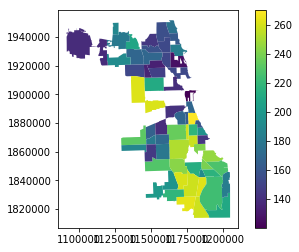

In [15]:
data1.plot(column='Cancer (All Sites)', legend=True)

[Text(0, 0, 'Rogers Park'),
 Text(0, 0, 'West Ridge'),
 Text(0, 0, 'Uptown'),
 Text(0, 0, 'Lincoln Square'),
 Text(0, 0, 'North Center'),
 Text(0, 0, 'Lake View'),
 Text(0, 0, 'Lincoln Park'),
 Text(0, 0, 'Near North Side'),
 Text(0, 0, 'Edison Park'),
 Text(0, 0, 'Norwood Park'),
 Text(0, 0, 'Jefferson Park'),
 Text(0, 0, 'Forest Glen'),
 Text(0, 0, 'North Park'),
 Text(0, 0, 'Albany Park'),
 Text(0, 0, 'Portage Park'),
 Text(0, 0, 'Irving Park'),
 Text(0, 0, 'Dunning'),
 Text(0, 0, 'Montclaire'),
 Text(0, 0, 'Belmont Cragin'),
 Text(0, 0, 'Hermosa'),
 Text(0, 0, 'Avondale'),
 Text(0, 0, 'Logan Square'),
 Text(0, 0, 'Humboldt Park'),
 Text(0, 0, 'West Town'),
 Text(0, 0, 'Austin'),
 Text(0, 0, 'West Garfield Park'),
 Text(0, 0, 'East Garfield Park'),
 Text(0, 0, 'Near West Side'),
 Text(0, 0, 'North Lawndale'),
 Text(0, 0, 'South Lawndale'),
 Text(0, 0, 'Lower West Side'),
 Text(0, 0, 'Loop'),
 Text(0, 0, 'Near South Side'),
 Text(0, 0, 'Armour Square'),
 Text(0, 0, 'Douglas'),
 Text(

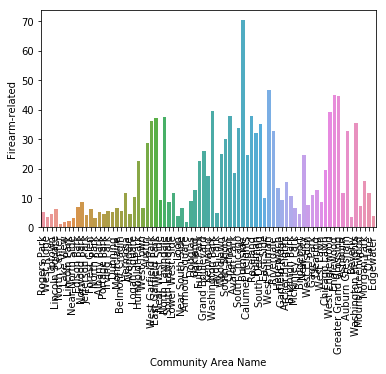

In [16]:
g = sns.barplot(x='Community Area Name', y= 'Firearm-related', data = health) 
g.set_xticklabels(g.get_xticklabels(),rotation='vertical')

Text(0.5, 1.0, 'Unemployment, Assault, and Teen Birth Rates')

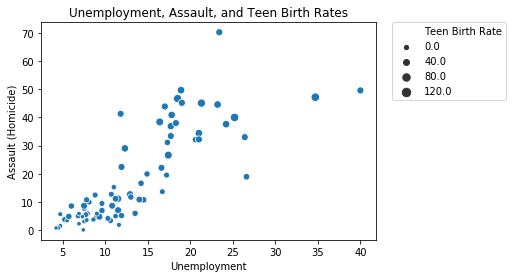

In [17]:
g = sns.scatterplot(x='Unemployment', y='Assault (Homicide)', data=health, size='Teen Birth Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Unemployment, Assault, and Teen Birth Rates')
#plt.text(x+0.3, y+0.3, 'Community Area Name', fontsize=9)